In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.max_rows = 5

from matplotlib import pyplot as plt

## Documentation

* Scikit-Learn: https://scikit-learn.org/stable/
* sklearn.LinearRegression(): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

* Matplotlib Pyplot : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
* Matplotlib  Scatter plots: pyplot.scatter(): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
* Matplotlib Line plots: pyplot.plot(): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

* Numpy np.arrange(): https://numpy.org/doc/stable/reference/generated/numpy.arange.html


# Chapter 5. Machine Learning and Regression Models

Prediction problems are ubiquitous in real world applications. For example:

- A real estate agent might want to predict the fair price of a home, using features of the home.
- A sports bettor might want to predict which team will win the game, using information about the teams.
- A historian might want to predict which historical figure wrote an anonymous document, using the words in the document.

In each case, we have two kinds of variables:

1. **features** (a.k.a. **predictors**, **inputs**, **independent variables**), such as square footage and number of bedrooms, that are used to predict...
2. ...a **label** (a.k.a. **response**, **output**, **dependent variable**), such as house price.

Mathematically, the prediction problem can be described as follows: if ${\bf x}$ denotes the features and $y$ the label, then the goal is to come up with a function $f$ such that $ f({\bf x})$ is "close" to $y$. The function $f$ is called a _prediction model_. If we have a new house, with features ${\bf x}_{\text{new}}$, we can use the prediction model $f$ to predict the price of this house as $f({\bf x}_{\text{new}})$.

How do we come up a prediction model $f$ in the first place? One way is to learn it from existing data, or **training data**, consisting of observations where both the features and label are known. It is easiest to visualize this process in the case where there is only one feature, so suppose we are trying to build a model that predicts the price of a home from the square footage (`Gr Liv Area`). Each observation in the training data is a home that was sold, so both the feature (square footage) and the label (price) are known. We can represent each house by a point on a scatterplot, as shown below. 



In [2]:
### get the Ames Housing dataset loaded

filename = "../data/AmesHousing.txt"
housing_df = pd.read_csv(filename, sep="\t")

housing_df


Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
...       ...     ...     ...       ...             ...        ...  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [3]:
housing_df["Bedroom AbvGr"].max()

bedroomColoring=["black","blue", "green", "red", "orange", "teal", "grey", "gold", "cyan"]

edgeColoring = [bedroomColoring[i] for i in list(housing_df["Bedroom AbvGr"])]



<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

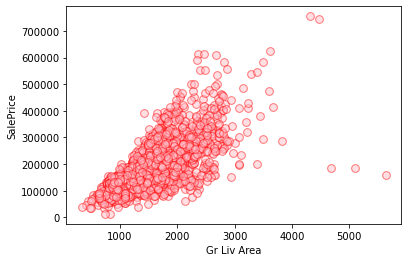

In [4]:
## Let's remember the scatter plot we built


housing_df.plot.scatter(x="Gr Liv Area", y = "SalePrice", alpha = 0.5, s=60, c="pink", edgecolor="red")

To learn a prediction model $f$ from this training data, we simply fit a curve to the data. For example, one reasonable prediction model is shown in red below.

![](predictive_model.png)

Now, to predict the price of a 2700 square foot home using this model, we would simply evaluate $f(2700)$, which comes out to about \\$300,000. The prediction process is shown in blue above.

The process of learning prediction models from data is known as **machine learning**. There are many ways to learn a prediction model from data, including _linear regression_, _decision trees_, and _neural networks_. In this chapter, we will focus on two machine learning algorithms: linear regression and another called **k-nearest neighbors** that leverages the distance metrics that you learned in Chapter 4.

Prediction models are divided into two types, depending on whether the label $y$ is categorical or quantitative. If the label is quantitative, then the prediction problem is a **regression** problem, and the model is called a **regressor**. If the label is categorical, then the prediction problem is a **classification** problem, and the model is called a **classifier**. Chapter 5 covers regression models, while Chapter 6 covers classification models.

# 5.1 Linear Regression

_Regressors_ are prediction models for quantitative labels. In this section, we will train a machine learning model that predicts the price of a house from its square footage and other features.

We will use the Ames housing data set as the training data. First, let's read in the data set.

First, let's build a model to predict the price from just a single feature, the square footage.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

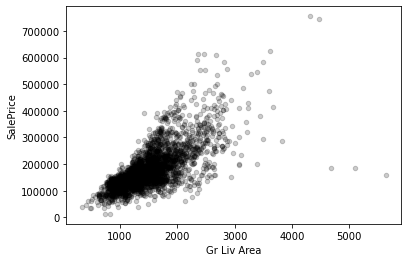

In [20]:
housing_df.plot.scatter(
    x="Gr Liv Area",
    y="SalePrice",
    c="black",
    alpha=.2
)

**Alex's Note**: Generally speaking, any function $y = f(x)$ can be thought of as a predictor/regressor. Given the scatterplot above, we can construct multiple predictor functions. Let's see what happens when we plot some of them.

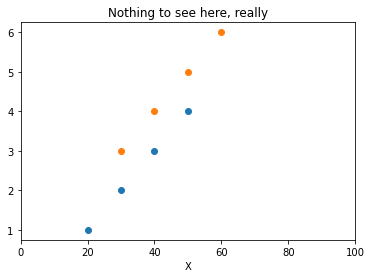

In [27]:
plt.figure()
plt.title("Nothing to see here, really")
plt.xlabel("X")
plt.xlim([0,100])
plt.scatter([20,30,40,50], [1,2,3,4])
plt.scatter([30,40,50,60], [3,4,5,6])
plt.show()

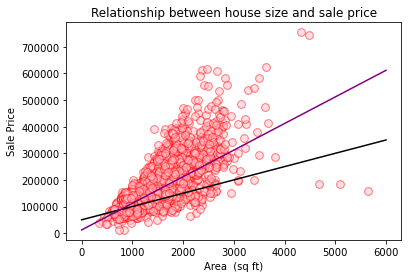

In [67]:
## we can switch to using matplotlib.pyplot for more sophisticated plots, combining multiple things in the same graph.

plt.figure()
plt.scatter(x=housing_df["Gr Liv Area"], y = housing_df["SalePrice"], alpha = 0.5, s=60, c="pink", edgecolors="red")
plt.xlabel("Area  (sq ft)")
plt.ylabel("Sale Price")
plt.title("Relationship between house size and sale price")

xl = np.array((range(0,6001, 20)))

### possible predictions
yl = np.array([50*x + 50000  for x in xl])
yl2 = np.array([100*x + 12000 for x in xl])
yl3 = np.array([80*x + 500*np.sqrt(x) + 10000 for x in xl])
yl4 = np.array([0.05*x*x + 10*x + 70000 for x in xl])
yl5 = np.array([800000 - 100*x for x in xl])

yl6 = np.array([110*x + 33000*np.sin(x) + 30000 for x in xl])

plt.plot(xl,  yl, c="black")
plt.plot(xl,  yl2, c="purple")
#plt.plot(xl,  yl3, c="green")
#plt.plot(xl,  yl4, c="blue")
#plt.plot(xl,  yl5, c="cyan")
#plt.plot(xl,  yl6, c="teal")


plt.show()

In [43]:
xl,yl, yl2

(array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
        2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200,
        4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000]),
 array([ 50000,  60000,  70000,  80000,  90000, 100000, 110000, 120000,
        130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000,
        210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000,
        290000, 300000, 310000, 320000, 330000, 340000, 350000]),
 array([ 12000,  32000,  52000,  72000,  92000, 112000, 132000, 152000,
        172000, 192000, 212000, 232000, 252000, 272000, 292000, 312000,
        332000, 352000, 372000, 392000, 412000, 432000, 452000, 472000,
        492000, 512000, 532000, 552000, 572000, 592000, 612000]))

In [45]:
def pr1(x):
    return 50*x + 50000

def pr2(x):
    return 100*x + 12000

In [47]:
housing_df.loc[18]["SalePrice"], housing_df.loc[18]["Gr Liv Area"]

print("Predictor 1: Actual:",housing_df.loc[18]["SalePrice"],"   Predicted: ", pr1(housing_df.loc[18]["Gr Liv Area"]))

print("Predictor 2: Actual:",housing_df.loc[18]["SalePrice"],"   Predicted: ", pr2(housing_df.loc[18]["Gr Liv Area"]))

Predictor 1: Actual: 141000    Predicted:  93200
Predictor 2: Actual: 141000    Predicted:  98400


In [66]:
np.array(housing_df.loc[0:10][["Gr Liv Area", "SalePrice"]])

array([[  1656, 215000],
       [   896, 105000],
       [  1329, 172000],
       [  2110, 244000],
       [  1629, 189900],
       [  1604, 195500],
       [  1338, 213500],
       [  1280, 191500],
       [  1616, 236500],
       [  1804, 189000],
       [  1655, 175900]])

**Alex's Notes**:  Generally speaking, when trying to build predictors, we want to achieve two core goals:


* **Accuracy** of the predictor: the predicted values $f(x)$ should be close to the real values $y$ of the variable we are trying to predict

* **Simplicity** of the predictor: the function $f(x)$ should be as simple to compute as possible


The *simplest* functions we know of are **linear functions**


Linear regression is a prediction model of the form 

$$ f(x) = \text{intercept} + \text{slope} \cdot x. $$

or

$$ f(x) = k\cdot x + b$$

The **slope** ($k$) (also called the **coefficient** in data science) and the **intercept** ($b$) are parameters of the model that have to be learned from data. 

These parameters affect the **accuracy** of the predictor function, i.e., how many mistakes it makes, and how big these mistakes are.

Let's investigate this.  Consider two of the linear predictors we looked at from above




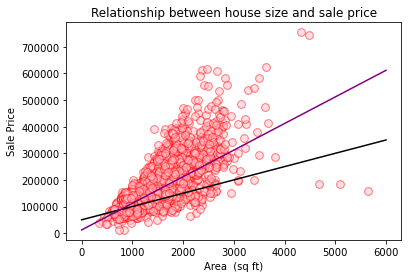

In [68]:

plt.figure()
plt.scatter(x=housing_df["Gr Liv Area"], y = housing_df["SalePrice"], alpha = 0.5, s=60, c="pink", edgecolors="red")
plt.xlabel("Area  (sq ft)")
plt.ylabel("Sale Price")
plt.title("Relationship between house size and sale price")

#xl = np.array((range(0,6001, 200)))

### possible predictions - they have already been defined, no need to rerun these statements
#yl = np.array([50*x + 50000  for x in xl])
#yl2 = np.array([100*x + 12000 for x in xl])
#yl3 = np.array([80*x + 500*np.sqrt(x) + 10000 for x in xl])
#yl4 = np.array([0.03*x*x + 10*x + 70000 for x in xl])
#yl5 = np.array([800000 - 100*x for x in xl])
#yl6 = np.array([110*x + 33000*np.sin(x) + 30000 for x in xl])

plt.plot(xl,  yl, c="black")
plt.plot(xl,  yl2, c="purple")


plt.show()


We will choose the slope and the intercept to minimize the sum of $(y - f(x))^2$, the squared distance between the label and the prediction, over the observations in the training data.

Which line is better: the purple or the black?

Let's figure it out.

In [74]:
def predictor1(x):
    return 50*x + 50000

def predictor2(x):
    return 100*x + 12000

### let's make our predictions

predictions1 = pd.Series([predictor1(x) for x in housing_df["Gr Liv Area"]])

predictions2 = pd.Series([predictor2(x) for x in housing_df["Gr Liv Area"]])

predictions1



0       132800
1        94800
         ...  
2928    119450
2929    150000
Length: 2930, dtype: int64

In [78]:
housing_df.loc[0]["SalePrice"]- predictions1[0]

82200

We can look at individual errors of prediction:

$$y - f(x)$$

If we denote the set of $x$ values for which we know the appropriate $y$ values as $X= \{x_1,\ldots, x_n\}$ and the matching $y$ values as $Y= \{y_1,\ldots, y_n\}$, then the error of prediction for a given observation $x_i$ is

$$ error_i = y_i - f(x_i)$$

We can compute them in a straightforward way. 

We also can compute *relative errors*:

$$ relError_i = \frac{y_i - f(x_i)}{y_i}$$

163527806

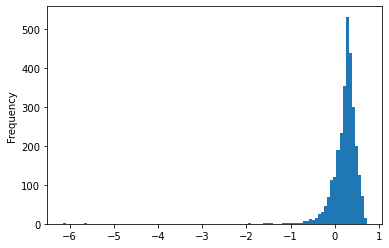

In [80]:
### Let's figure out how much off we were

diffs1 = housing_df["SalePrice"] - predictions1

diffs1Relative = diffs1/housing_df["SalePrice"]


## let's take a look at the distribution of relative errors.
diffs1Relative.plot.hist(bins=100)
diffs1Relative.max(), diffs1Relative.min()



Because negative and positive errors cancel each other out if we add them up, if we wanted to quantify the overall error of the prediction on the entire set $X = \{x_1,\ldots, x_n\}$, we need to look at positive versions of errors.

There are two ways to do this: **absolute error**:  $aerror_i = |y_i - f(x_i)|$ and **square error**" $sqerror_i = (y_i-f(x_i))^2$

We will use the **square error** today, it is a more common way to measure errors of linear predictors.

We can construct the overall estimate of error as follows:

 $$SSE = \sum_{i=1}^n (y_i-f(x_i))^2$$

**SSE** stands for **Sum of Squared Errors**.

If we wanted to understand what this means in terms of "error per prediction", we can use the  **MAE** or **Mean Squared Error** measure:

$$MSE = \frac{SSE}{n}$$

Let's take a look at what we can discover about the squared errors of our two predictors
 


In [82]:
diffs2 = housing_df["SalePrice"] - predictions2

sse1 =  (diffs1**2).sum()

sse2 = (diffs2**2).sum()




And now for the reveal:

In [83]:
##(sse1, sse1/len(housing)), (sse2, sse2/len(housing))

sse1, sse2

(21330451247034, 10495818409634)

In [84]:
sse1 < sse2

False

In [87]:
## sum absolute errors

sae1 = diffs1.abs().sum()

sae2 = diffs2.abs().sum()

sae1,sae2


(179174168, 119830966)

In [88]:
### MEAN ABSOLUTE ERRORS

mae1 = sae1/len(housing_df)
mae2 = sae2/len(housing_df)

mae1,mae2

(61151.59317406143, 40897.94061433447)

The second predictor has a smaller **SSE** therefore it is better than the first predictor.

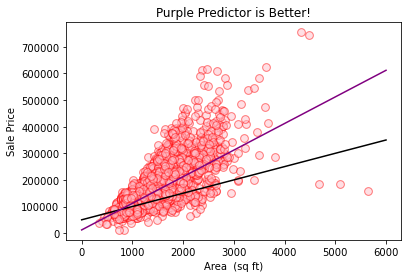

In [84]:

plt.figure()
plt.scatter(x=housing_df["Gr Liv Area"], y = housing_df["SalePrice"], alpha = 0.5, s=60, c="pink", edgecolors="red")
plt.xlabel("Area  (sq ft)")
plt.ylabel("Sale Price")
plt.title("Purple Predictor is Better!")

#xl = np.array((range(0,6001, 200)))

### possible predictions - they have already been defined, no need to rerun these statements
#yl = np.array([50*x + 50000  for x in xl])
#yl2 = np.array([100*x + 12000 for x in xl])
#yl3 = np.array([80*x + 500*np.sqrt(x) + 10000 for x in xl])
#yl4 = np.array([0.03*x*x + 10*x + 70000 for x in xl])
#yl5 = np.array([800000 - 100*x for x in xl])
#yl6 = np.array([110*x + 33000*np.sin(x) + 30000 for x in xl])

plt.plot(xl,  yl, c="black")
plt.plot(xl,  yl2, c="purple")


plt.show()

<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

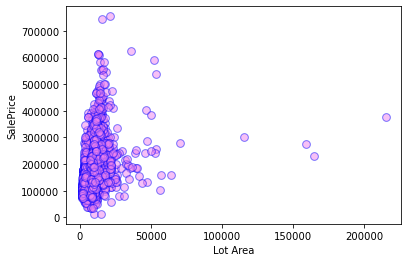

In [90]:
housing_df.plot.scatter(x="Lot Area", y="SalePrice",s=60, c="violet", alpha=0.5, edgecolor="blue")

<function matplotlib.pyplot.show(close=None, block=None)>

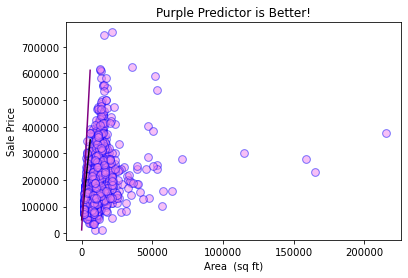

In [92]:

plt.figure()

plt.scatter(x=housing_df["Lot Area"], y=housing_df["SalePrice"],s=60, c="violet", alpha=0.5, edgecolor="blue")
#(x=housing_df["Gr Liv Area"], y = housing_df["SalePrice"], alpha = 0.5, s=60, c="pink", edgecolors="red")
plt.xlabel("Area  (sq ft)")
plt.ylabel("Sale Price")
plt.title("Purple Predictor is Better!")

xl = np.array((range(0,6001, 200)))

### possible predictions - they have already been defined, no need to rerun these statements
#yl = np.array([50*x + 50000  for x in xl])
#yl2 = np.array([100*x + 12000 for x in xl])
#yl3 = np.array([80*x + 500*np.sqrt(x) + 10000 for x in xl])
#yl4 = np.array([0.03*x*x + 10*x + 70000 for x in xl])
#yl5 = np.array([800000 - 100*x for x in xl])
#yl6 = np.array([110*x + 33000*np.sin(x) + 30000 for x in xl])

plt.plot(xl,  yl, c="black")
plt.plot(xl,  yl2, c="purple")
plt.show

# Implementing Linear Regression from Scratch

The question we want to as is this:

**if we limit ourselves to linear predictors, what values of slope and intercept yield the smallest error of prediction for a given set 
$(X,Y)$ of data points?**

The process of discovering the best values is called **training** or **fitting a model**. For linear regression, the **model** is a pair of values $(k,b)$ where $k$ is the **slope** of the linear predictor, and $b$ is the **intercept**.


There are simple formulas for the optimal slope and the intercept when there is one feature in the linear regression model:

\begin{align}
\widehat{\text{slope}} &= \frac{\text{covariance between $x$ and $y$}}{\text{variance of $x$}} \\
\widehat{\text{intercept}} &= \text{mean of $y$} - \widehat{\text{slope}} \cdot \text{mean of $x$} 
\end{align}

The "hats", i.e., $\widehat{\phantom{S}}$, above the slope and the intercept, indicate that they were estimated from the training data.

Let's calculate the estimated slope and the intercept for predicting house prices from square footage.

To remind you, *covariance* of two variables $x$ and $y$ ($X = (x_1,\ldots, x_n), Y=(y_1,\ldots, y_n)$) is 

$$cov(x,y) = \frac{\sum_{i=1}^n (x_i -\mu_x)(y_i-\mu_y)}{n}$$

where $\mu_x$ and $\mu_y$ are respectively the means of $(x_1,\ldots, x_n)$ and $(y_1,\ldots, y_n)$

*Variance* of a variable is 

$$var(x) = \frac{\sum_{i=1}^n(x_i - \mu_x)^2}{n}$$



In [95]:
# Rename the variables to x_train and y_train.
x_train = housing_df["Gr Liv Area"]
y_train = housing_df["SalePrice"]

# Implement the formulas for the slope and intercept from above.
# (The trailing underscores play the role of the hats in the formulas.)
slope_ = x_train.cov(y_train) / x_train.var()
intercept_ = y_train.mean() - slope_ * x_train.mean()
slope_, intercept_

(111.69400085780023, 13289.634364759724)

Therefore, the linear regression model is 

$$ f(\text{square footage}) = 13289.63 + 111.694 \cdot \text{square footage}. $$

(note, one of our predictions: $f(x) = 100*x + 12000$ is actually quite close.)


Let's use this model to make some predictions:

- A $2700$ square foot house is predicted to cost
$$ 13289.63 + 111.694 \cdot 2700 = \$314863.43 $$
- A $1500$ square foot house is predicted to cost 
$$ 13289.63 + 111.694 \cdot 1500 = \$180830.63 $$

The model will even let you make predictions that make no sense:

- A $-100$ square foot house is predicted to cost
$$ 13289.63 + 111.694 \cdot (-100) = \$2120.23. $$

It is your responsibility as a data scientist to use the model responsibly---only in situations where it makes sense.

To add the regression model as a line to our scatterplot, we create a grid of feature values $x_{\text{new}}$ and predict the label at each of these feature values.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

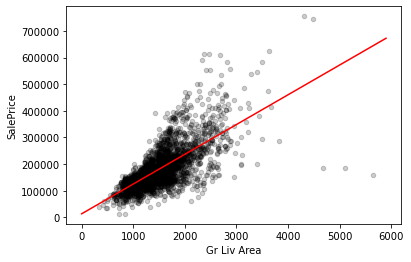

In [105]:
housing_df.plot.scatter(
    x="Gr Liv Area", y="SalePrice",
    c="black", alpha=.2
)

# First, create a grid of sqft values.
# We will store this in a pandas Series for easy plotting.
x_new = pd.Series(
    data=np.arange(0, 6000, step=100),
    index=np.arange(0, 6000, step=100)
)

# Calculate the predicted y-values. 
# (The trailing underscore in y_new_ emphasizes that these are predicted values.)
y_new_ = intercept_ + slope_ * x_new

# Since y_new_ is a Series indexed by the x-values, .plot.line() works.
y_new_.plot.line(color="red")

In [104]:
y_new_

0        13289.634365
100      24459.034451
            ...      
5800    661114.839340
5900    672284.239426
Length: 60, dtype: float64

Or, we use the full `matplotlib` functionality as we did above

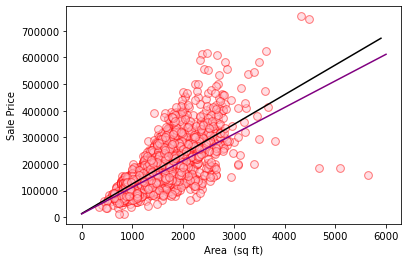

In [107]:

plt.figure()
plt.scatter(x=housing_df["Gr Liv Area"], y = housing_df["SalePrice"], alpha = 0.5, s=60, c="pink", edgecolors="red")
plt.xlabel("Area  (sq ft)")
plt.ylabel("Sale Price")


plt.plot(x_new, y_new_, c="black")
plt.plot(xl,  yl2, c="purple")


plt.show()

# Linear Regression in _scikit-learn_

Now we will implement the same model using [_scikit-learn_](http://scikit-learn.org/), a Python library that unifies machine learning models under a common interface. All machine learning models are trained and used in the exact same way:

1. Declare the model.
2. Fit the model to training data, consisting of both features $X$ and labels $y$.
3. Use the model to predict the labels for new values of the features.

In [111]:
from sklearn.linear_model import LinearRegression

In [114]:
m = LinearRegression()

x_train.to_frame()

Gr Liv Area
0            1656
1             896
...           ...
2928         1389
2929         2000

[2930 rows x 1 columns]

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

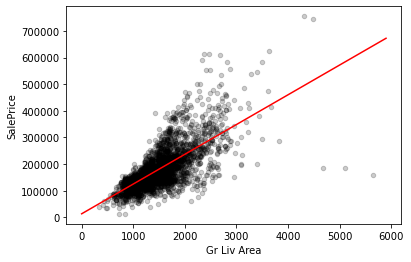

In [126]:
housing_df.plot.scatter(
    x="Gr Liv Area", y="SalePrice",
    c="black", alpha=.2
)



# Step 1: Declare the model.
model = LinearRegression()

# Step 2: Fit the model to training data.
# This step determines the optimal slope and intercept.
X_train = x_train.to_frame() # x_train needs to be a DataFrame, as explained below
model.fit(X_train, y_train)

# Step 3: Use the model to predict for new observations.
X_new = x_new.to_frame() # x_new also needs to be a DataFrame, as explained below
y_new_ = pd.Series(data = model.predict(X_new), index = X_new.index)



# scikit-learn always returns numpy arrays. We will
# turn it into a Series for easy plotting.
y_new_.plot.line(x=X_new, color="red")

In [121]:
model.coef_, model.intercept_

y_new_

array([ 13289.63436476,  24459.03445054,  35628.43453632,  46797.8346221 ,
        57967.23470788,  69136.63479366,  80306.03487944,  91475.43496522,
       102644.835051  , 113814.23513678, 124983.63522256, 136153.03530834,
       147322.43539412, 158491.8354799 , 169661.23556568, 180830.63565146,
       192000.03573724, 203169.43582302, 214338.8359088 , 225508.23599458,
       236677.63608036, 247847.03616614, 259016.43625192, 270185.8363377 ,
       281355.23642348, 292524.63650926, 303694.03659504, 314863.43668082,
       326032.8367666 , 337202.23685238, 348371.63693816, 359541.03702394,
       370710.43710972, 381879.8371955 , 393049.23728128, 404218.63736706,
       415388.03745284, 426557.43753862, 437726.8376244 , 448896.23771018,
       460065.63779596, 471235.03788174, 482404.43796752, 493573.8380533 ,
       504743.23813908, 515912.63822486, 527082.03831064, 538251.43839642,
       549420.8384822 , 560590.23856798, 571759.63865376, 582929.03873954,
       594098.43882532, 6

Note that _scikit-learn_ required the features to be supplied in the form of a two-dimensional array (or `DataFrame`), since in general, there may be multiple observations (rows) and multiple features (columns). In the model above, we only had one feature (square footage), so we simply stored the observations in a one-dimensional array (a `Series`). We had to convert this to a `DataFrame` before passing it to _scikit-learn_.

Did you notice how we did not need the slope and intercept to plot the regression line? All we needed were the predictions from the model. But the slope and intercept are stored in the model object, in case you need them. To access them, use the `.coef_` and `.intercept_` attributes, respectively. (Notice how _scikit-learn_ uses the underscore convention for attributes that are estimated from the data.)

In [97]:
model

LinearRegression()

In [127]:
model.coef_, model.intercept_

(array([111.69400086]), 13289.634364759491)

The `.coef_` attribute is an array, instead of a single number, in anticipation of situations where there is more than one feature---and hence, more than one coefficient.

For the simple linear regression model above, _scikit-learn_ was hardly necessary, since the code was no simpler than implementing the formulas ourselves. However, _scikit-learn_ proves its worth as soon as we start fitting more complicated models.

For example, linear regression generalizes to more features. Suppose we have $d$ features $x_1, x_2, ..., x_d$. Then the linear regression model is 

$$ f({\bf x}) = \text{intercept} + \text{coef}_1 \cdot x_1 + \text{coef}_2 \cdot x_2 + ... + \text{coef}_d \cdot x_d. $$

The idea is the same: we choose the intercept and the coefficients to minimize the sum of squared distances $(y - f({\bf x}))^2$ between the labels and the predictions on the training data. Unfortunately, the formula for the optimal intercept and coefficients is no longer simple and requires an understanding of linear algebra, which is beyond the scope of this book. Nevertheless, _scikit-learn_ can fit the model for us.

Suppose we want to predict the price of a home using several features, including categorical variables, like `Neighborhood` and `Bldg Type`.

In [128]:
features = ["Lot Area", "Gr Liv Area",
            "Full Bath", "Half Bath", "Bedroom AbvGr",
            "Year Built", "Yr Sold",
            "Neighborhood", "Bldg Type"]

The first step is to encode the categorical variables as quantitative variables. One way to do this is to use `pd.get_dummies()`, but we can also do it in _scikit-learn_ using `OneHotEncoder`:

In [129]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing: Dummy encode categorical variables.
encoder = make_column_transformer(
    (OneHotEncoder(), ["Neighborhood", "Bldg Type"]),
    remainder="passthrough"
)
encoder.fit(housing_df[features])

X_train = encoder.transform(housing_df[features])
y_train = housing_df["SalePrice"]

X_train

<2930x40 sparse matrix of type '<class 'numpy.float64'>'
	with 24507 stored elements in Compressed Sparse Row format>

Now the features are ready to be passed to _scikit-learn_.

In [130]:
# Step 1: Declare the model.
model = LinearRegression()

# Step 2: Fit the model to training data.
model.fit(X_train, y_train)

LinearRegression()

It is much harder to visualize a prediction model in 34-dimensions, but we can still make predictions using it.

In [131]:
# Step 3: Use the model to make predictions for new observations.
new_df = pd.DataFrame(
    columns=features,
    data=[
        {"Lot Area": 9000,
         "Gr Liv Area": 1400,
         "Full Bath": 2,
         "Half Bath": 1,
         "Bedroom AbvGr": 3,
         "Year Built": 1980,
         "Yr Sold": 2011,
         "Neighborhood": "OldTown",
         "Bldg Type": "1Fam"}
    ]
)

# We need to transform this new data.
X_new = encoder.transform(new_df)

# Now it's ready for model.predict()
model.predict(X_new)

array([161667.22208554])

Note that `model.predict` expects the features to be formatted exactly as they were formatted in `model.fit`.

We could also reconstruct the predictions from the coefficients and the intercept.

In [132]:
model.coef_, model.intercept_

(array([ 6.60547421e+02,  6.04478168e+03,  1.02395522e+03, -2.20303603e+04,
        -1.71816411e+04, -1.74460982e+04,  1.40704770e+04, -3.78680624e+04,
        -3.58381328e+04,  4.34814697e+04,  9.42254615e+04, -3.68166228e+04,
         4.35800090e+03, -1.44539788e+04, -2.79873437e+04, -2.41875744e+04,
         1.00976697e+04, -2.53880343e+04,  3.54886038e+04,  6.51997827e+04,
        -2.78112648e+04, -3.10212073e+04, -2.58928661e+04, -2.92126621e+04,
         8.12073430e+03,  7.36434455e+04,  4.62483168e+03,  1.20960880e+04,
         2.87881616e+04,  1.52381955e+04, -2.60204945e+03, -3.15434503e+04,
        -9.88085728e+03,  5.45346884e-01,  8.88645747e+01, -1.91052228e+02,
        -7.98889100e+03, -1.29784373e+04,  8.27733205e+02, -3.40104215e+02]),
 -876284.0629529405)

In [12]:
model.intercept_ + X_new * model.coef_

array([159911.92941284])

# Communication Corner

One of the advantages of the linear regression model is that it is interpretable. All of its parameters have a natural interpretation in the context of the application.

- The intercept is the predicted label when all of the features are equal to zero. This may or may not be useful, depending on whether zero is a possible value for the features. In the example above, our model would predict a house with 0 square feet, 0 bedrooms, 0 bathrooms, etc. to cost \\$180,796.06, but this prediction is not meaningful, since it is impossible to have a house that is 0 square feet.
- Each coefficient represents the _change_ in the predicted label when the corresponding feature is increased by $1$,   holding all other features constant. 

# Exercises

**Exercise 1.** You would like to predict how much a male diner will tip on a bill of \\$40.00 on a Sunday. Build a linear regression model to answer this question, using the tips dataset (`../data/tips.csv`) as your training data.  Visualize your work with a scatter plot and a line plot of the linear regression predictor

In [13]:
# TYPE YOUR CODE HERE

**Exercise 2.** Suppose you standardize the variables before fitting the linear regression. Does the estimated intercept change? Do the estimated coefficients change? Do the predicted labels change?

In [14]:
# TYPE YOUR CODE HERE

**Exercise 3** Consider the predictor we used earlier in this notebook for the dependency 
of the house price ($y$) on the square footage of the house ($x$):

$$y = 110\cdot x + 33000 \cdot \sin(x) + 30000$$
         
 For the Ames Housing dataset compute the SSE (sum of squared errors), MSE (mean squared error), SAE (sum of absolute errors), and MAE (mean absolute error).
 
 Compare the errors you got to the errors for the optimal linear regressor constructed in class.  Which of the two predictors is better?

**Explain your answer**

### Submission 

Due date: May 3, **before class**!

Handin command:
              `handin dekhtyar 301-lab09 <file>`